# 1. Import libraries and data

In [2]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
plt.style.use('ggplot')

In [3]:
# Turn your project folder path into a string

path = r'/Users/peterreadman/Desktop/Python Projects/CareerFoundry/04-2020 Instacart Basket Analysis/'

In [4]:
# import pickle file

df = pd.read_pickle(os.path.join(path,'02 Data','02b Prepared Data','orders_products_merged_high_activity.pkl'))

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,Order_ID,User_ID,Order_Number,Orders_day_of_the_week,Order_hour_of_day,Days_Since_Prior_Order,Product_ID,Add_To_Cart_Order,Reordered,Product_Name,Aisle_ID,Department_ID,Prices,Rrice_Range_Loc,Busiest_Day,Busiest_Days,Busiest_Period_of_Day,Max_Order,Loyalty_Flag,Mean_Prices,Spending_Flag,Median_Days,Frequency_Flag,Gender,State,Age,Date_Joined,Dependents,Family_Status,Income,Region,Low_Activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No


# Step 5: Customer Profiles
## 5a. Customers by Age Group

In [7]:
# Explore the 'Age' column for age range of customers 
df['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

**Observations:**
- The youngest customers are 18</br>
- The oldest customers are 81
- The average (mean) customer age is 49

In [8]:
# How many of each age are there
df['Age'].value_counts().sort_index()

18    478457
19    496077
20    480194
21    489116
22    490811
       ...  
77    477999
78    471119
79    508337
80    492750
81    485847
Name: Age, Length: 64, dtype: int64

In [9]:
# Create three age-groups: Young Adult (18–39), Middle-Age (40–64), Seniors (65+)
# Condition for 'Young Adult'
df.loc[df['Age'] <= 39, 'Age_Group'] = 'Young Adult'

In [10]:
# Condition for 'Middle-Aged'
df.loc[(df['Age'] >= 40) & (df['Age'] <=64), 'Age_Group'] = 'Middle-Aged'

In [11]:
# Condition for 'Senior'
df.loc[df['Age'] >=65, 'Age_Group'] = 'Senior'

In [12]:
df['Age_Group'].value_counts(dropna = False)

Middle-Aged    12103910
Young Adult    10665110
Senior          8195544
Name: Age_Group, dtype: int64

**Observations:**
- Middle-Aged (40–64) is the largest age-group in terms of customers
- Senior (65+) is the smallest age-group in terms of customers

Text(0, 0.5, '')

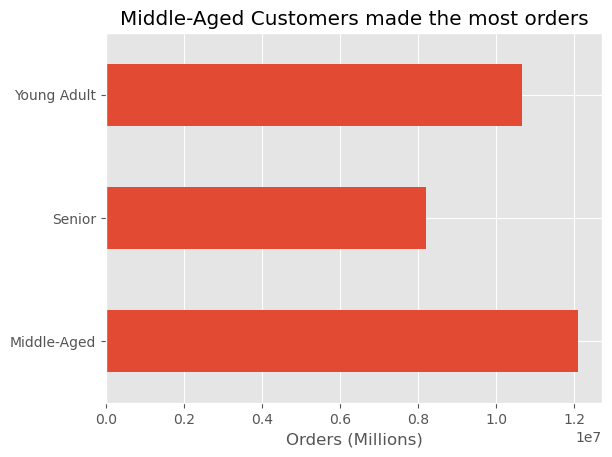

In [13]:
# Plot the distribution of Age Groups (count of orders)

age_group_bar = df['Age_Group'].value_counts().sort_index().plot(kind='barh', title='Middle-Aged Customers made the most orders')

age_group_bar.set_xlabel('Orders (Millions)')
age_group_bar.set_ylabel('')

## 5b. Customers by Income

In [14]:
# Explore the income column
df['Income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: Income, dtype: float64

**Observations:**
- mean customer income = 99,895
- lowest customer income = 25,903
- highest customer income = 593,901

In [15]:
# Calculate the median income
median_income = df['Income'].median()

print("Median income: ", median_income)

Median income:  96765.0


In [16]:
# Create income groups:
# Low Income: Less than $50,000
# Middle Income: $50,000 to $99,999
# Upper-Middle Income: $100,000 to $199,999
# High Income: $200,000 and above

# Create category for 'Low Income'
df.loc[df['Income'] < 50000, 'Income_Bracket'] = 'Low Income'

In [17]:
# Create cateory for 'Middle Income'
df.loc[(df['Income'] >= 50000) & (df['Income'] <100000), 'Income_Bracket'] = 'Middle Income'

In [18]:
# Create condition for 'Upper-Middle Income'
df.loc[(df['Income'] >= 100000) & (df['Income'] < 200000), 'Income_Bracket'] = 'Upper-Middle Income'

In [19]:
# Create condition for 'High Income'
df.loc[df['Income'] >= 200000, 'Income_Bracket'] = 'High Income'

In [20]:
# Check the value counts of 'Income_Bracket'
df['Income_Bracket'].value_counts(dropna = False).sort_index(ascending=False)

Upper-Middle Income    13953260
Middle Income          13394608
Low Income              3362554
High Income              254142
Name: Income_Bracket, dtype: int64

**Observations:**
- Most customers fall into the Upper-Middle Income bracket, with the Middle Income bracket having the second most customers
- the High Income bracket has the fewest customers
- plot income bracket against orders and/or prices of products ordered

Text(0, 0.5, '')

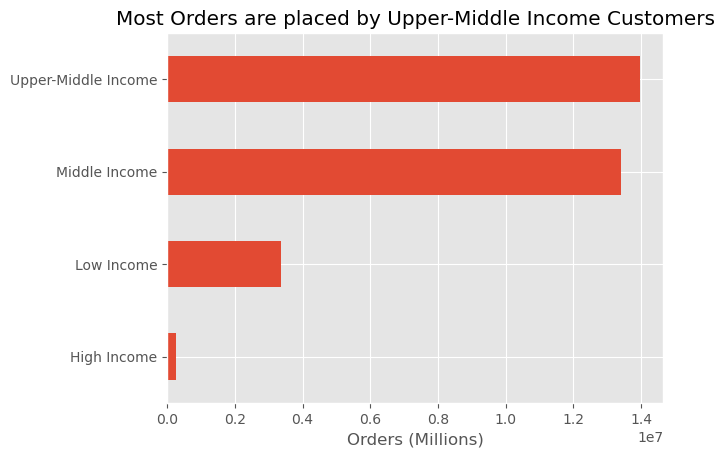

In [21]:
# Plot the distribution of Income Bracket (count of orders)

ax = df['Income_Bracket'].value_counts().sort_index().plot(kind='barh', title='Most Orders are placed by Upper-Middle Income Customers')

ax.set_xlabel('Orders (Millions)')
ax.set_ylabel('')

## 5c. Customers by dependents (Household Size)

In [22]:
# Explore the 'Dependents' variable

df['Dependents'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: Dependents, dtype: float64

**Observations:**
- number of dependants range from 0–3

In [23]:
# Calculate the mode number of dependants
mode_dependents = df['Dependents'].mode()

print("The mode number of dependents: ", mode_dependents)

The mode number of dependents:  0    3
Name: Dependents, dtype: int64


In [24]:
# Explore the 'Family_Status' column

df['Family_Status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: Family_Status, dtype: int64

In [25]:
# get the percentage of each value for 'Family_Status'

df['Family_Status'].value_counts(normalize=True).round(2)

married                             0.70
single                              0.16
divorced/widowed                    0.09
living with parents and siblings    0.05
Name: Family_Status, dtype: float64

In [26]:
df.groupby(['Family_Status', 'Dependents']).size().sort_index()

Family_Status                     Dependents
divorced/widowed                  0             2645271
living with parents and siblings  1              508045
                                  2              484658
                                  3              488469
married                           1             7211061
                                  2             7248603
                                  3             7284047
single                            0             5094410
dtype: int64

Is it fair to assume family sizes:
- married = customer + dependents + spouse OR [dependents + 2]
- divorced/widowed = dependents + 1
- single = dependents + 1
- living with parents and siblings = dependents + 1 + n (where n is unknown


In [27]:
# call value counts of dependents

df['Dependents'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: Dependents, dtype: int64

In [28]:
# Create groups for 'Family_Size' based on dependents as 'Small' 'Medium' Large'
# Create condition for 'Small'

df.loc[df['Dependents'] < 1, 'Household_Size'] = 'Small'

In [29]:
# Create condition for 'Medium'

df.loc[(df['Dependents'] > 0) & (df['Dependents'] < 3), 'Household_Size'] = 'Medium'

In [30]:
# Create condition for 'Large'

df.loc[df['Dependents'] > 2, 'Household_Size'] = 'Large'

In [31]:
df['Household_Size'].value_counts()

Medium    15452367
Large      7772516
Small      7739681
Name: Household_Size, dtype: int64

**Observations:**
- Approximately half of Instacart customers have a Medium-size household
- The other half of Instacart customers are divided roughly equally into Large and Small household sizes

Text(0, 0.5, 'Number of Orders')

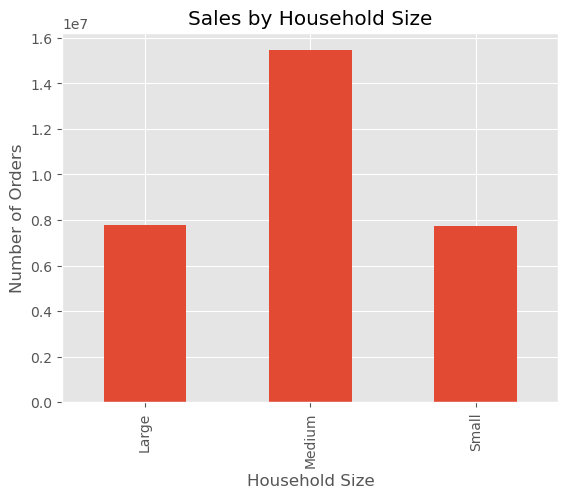

In [32]:
# Plot the distribution of Household Size (count of orders)

ax = df['Household_Size'].value_counts().sort_index().plot(kind='bar', title='Sales by Household Size')

ax.set_xlabel('Household Size')
ax.set_ylabel('Number of Orders')

## Customer profiles based on products purchased
- customer profile for: from **Babies** department
- customer profile for: from **Pets** department

In [33]:
# import departments dataframe

depts = pd.read_csv(os.path.join(path, '02 Data','02b Prepared Data', 'departments_wrangled.csv'))

In [34]:
# Rename 'Unnamed: 0' column to 'Department_ID'

depts.rename(columns={'Unnamed: 0': 'Department_ID', 'department': 'Department'}, inplace=True)

In [35]:
depts.head()

,Department_ID,Department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [36]:
data_dict = depts.to_dict('index')

In [37]:
data_dict

{0: {'Department_ID': 1, 'Department': 'frozen'},
 1: {'Department_ID': 2, 'Department': 'other'},
 2: {'Department_ID': 3, 'Department': 'bakery'},
 3: {'Department_ID': 4, 'Department': 'produce'},
 4: {'Department_ID': 5, 'Department': 'alcohol'},
 5: {'Department_ID': 6, 'Department': 'international'},
 6: {'Department_ID': 7, 'Department': 'beverages'},
 7: {'Department_ID': 8, 'Department': 'pets'},
 8: {'Department_ID': 9, 'Department': 'dry goods pasta'},
 9: {'Department_ID': 10, 'Department': 'bulk'},
 10: {'Department_ID': 11, 'Department': 'personal care'},
 11: {'Department_ID': 12, 'Department': 'meat seafood'},
 12: {'Department_ID': 13, 'Department': 'pantry'},
 13: {'Department_ID': 14, 'Department': 'breakfast'},
 14: {'Department_ID': 15, 'Department': 'canned goods'},
 15: {'Department_ID': 16, 'Department': 'dairy eggs'},
 16: {'Department_ID': 17, 'Department': 'household'},
 17: {'Department_ID': 18, 'Department': 'babies'},
 18: {'Department_ID': 19, 'Department

Text(0, 0.5, 'Department ID')

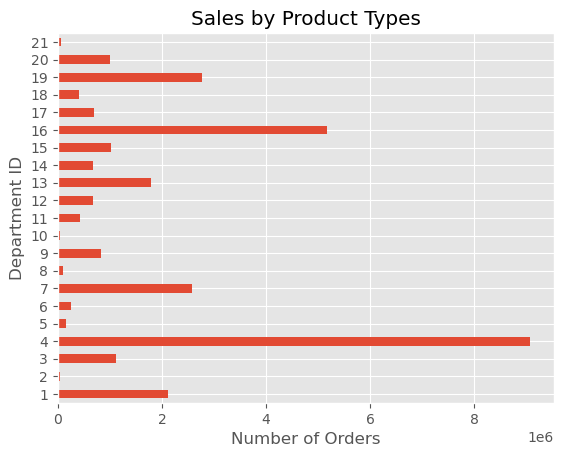

In [38]:
# See which departments sell the most products

ax = df['Department_ID'].value_counts().sort_index().plot(kind='barh', title='Sales by Product Types')

ax.set_xlabel('Number of Orders')
ax.set_ylabel('Department ID')

In [39]:
df_pets = df.loc[df['Department_ID']==8]
df_pets.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Orders_day_of_the_week',
       'Order_hour_of_day', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Prices', 'Rrice_Range_Loc', 'Busiest_Day',
       'Busiest_Days', 'Busiest_Period_of_Day', 'Max_Order', 'Loyalty_Flag',
       'Mean_Prices', 'Spending_Flag', 'Median_Days', 'Frequency_Flag',
       'Gender', 'State', 'Age', 'Date_Joined', 'Dependents', 'Family_Status',
       'Income', 'Region', 'Low_Activity', 'Age_Group', 'Income_Bracket',
       'Household_Size'],
      dtype='object')

Text(0, 0.5, 'Number of Orders')

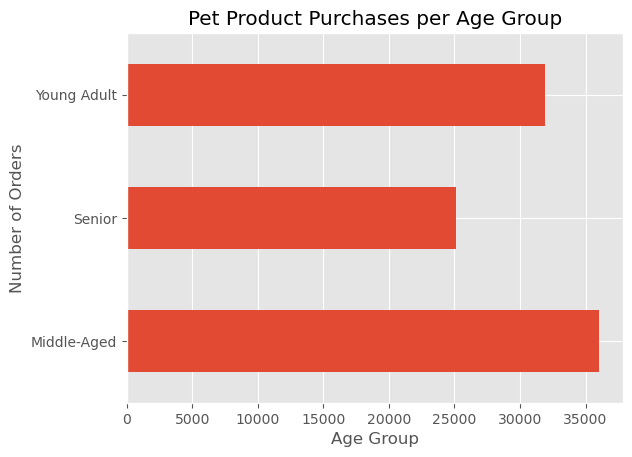

In [40]:
# Create a bar chart of 'pets' purchases per Age Group

ax = df_pets['Age_Group'].value_counts().sort_index().plot(kind='barh', title='Pet Product Purchases per Age Group')

ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Orders')

Text(0, 0.5, 'Number of Orders')

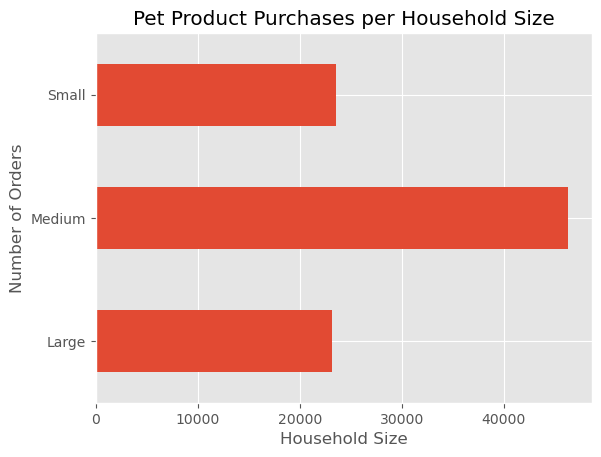

In [41]:
# Create a bar chart of 'pets' purchases per Household Size

ax = df_pets['Household_Size'].value_counts().sort_index().plot(kind='barh', title='Pet Product Purchases per Household Size')

ax.set_xlabel('Household Size')
ax.set_ylabel('Number of Orders')

Text(0, 0.5, 'Number of Orders')

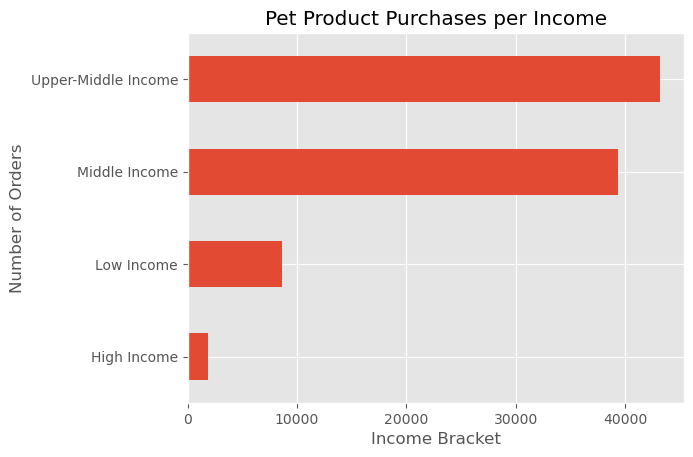

In [42]:
# Create a bar chart of 'pets' purchases per Income Bracket

ax = df_pets['Income_Bracket'].value_counts().sort_index().plot(kind='barh', title='Pet Product Purchases per Income')

ax.set_xlabel('Income Bracket')
ax.set_ylabel('Number of Orders')

In [43]:
# Create a subset for 'Babies' products

df_babies = df.loc[df['Department_ID']==18]
df_babies

,Order_ID,User_ID,Order_Number,Orders_day_of_the_week,Order_hour_of_day,Days_Since_Prior_Order,Product_ID,Add_To_Cart_Order,Reordered,Product_Name,Aisle_ID,Department_ID,Prices,Rrice_Range_Loc,Busiest_Day,Busiest_Days,Busiest_Period_of_Day,Max_Order,Loyalty_Flag,Mean_Prices,Spending_Flag,Median_Days,Frequency_Flag,Gender,State,Age,Date_Joined,Dependents,Family_Status,Income,Region,Low_Activity,Age_Group,Income_Bracket,Household_Size
1508,1382150,109,6,1,9,15.0,3858,5,0,2nd Foods Chicken & Gravy,92,18,2.3,Low-range product,Regularly busy,Busiest days,Average orders,6,New customer,5.850725,Low spender,26.0,Non-frequent customer,Female,Connecticut,67,2018-07-29,1,married,41805,Northeast,No,Senior,Low Income,Medium
2893,2684151,290,22,6,10,7.0,45309,32,0,Purple Carrot & blueberry Puffs,92,18,11.4,Mid-range product,Regularly busy,Regularly busy,Most orders,51,Loyal customer,7.285597,Low spender,7.0,Frequent customer,Female,Michigan,24,2019-05-18,1,married,55550,Midwest,No,Young Adult,Middle Income,Medium
3508,2684151,290,22,6,10,7.0,15076,33,0,Graduates Fruit Pick-Ups Diced Apples,92,18,5.8,Mid-range product,Regularly busy,Regularly busy,Most orders,51,Loyal customer,7.285597,Low spender,7.0,Frequent customer,Female,Michigan,24,2019-05-18,1,married,55550,Midwest,No,Young Adult,Middle Income,Medium
3982,2332460,420,21,5,17,11.0,14408,1,0,Unflavored Oral Electrolyte Solution,92,18,2.0,Low-range product,Regularly busy,Regularly busy,Average orders,22,Regular customer,7.387805,Low spender,7.0,Frequent customer,Female,Hawaii,26,2018-10-17,2,married,97248,West,No,Young Adult,Middle Income,Medium
4030,58188,420,3,6,13,23.0,30161,7,0,"Face, Hand & Baby Wipes Fragrance Free",56,18,5.7,Mid-range product,Regularly busy,Regularly busy,Most orders,22,Regular customer,7.387805,Low spender,7.0,Frequent customer,Female,Hawaii,26,2018-10-17,2,married,97248,West,No,Young Adult,Middle Income,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404168,1903809,194803,5,4,17,23.0,879,1,1,Baby Dry Diapers Size 4,56,18,10.3,Mid-range product,Least busy,Least busy days,Average orders,7,New customer,8.311111,Low spender,30.0,Non-frequent customer,Male,Massachusetts,63,2018-06-23,0,divorced/widowed,125997,Northeast,No,Middle-Aged,Upper-Middle Income,Small
32404169,1058638,194803,6,2,7,30.0,879,1,1,Baby Dry Diapers Size 4,56,18,10.3,Mid-range product,Regularly busy,Regularly busy,Average orders,7,New customer,8.311111,Low spender,30.0,Non-frequent customer,Male,Massachusetts,63,2018-06-23,0,divorced/widowed,125997,Northeast,No,Middle-Aged,Upper-Middle Income,Small
32404762,193552,21688,1,2,10,NaN,2633,1,0,Advance Powder Infant Formula,92,18,14.0,Mid-range product,Regularly busy,Regularly busy,Most orders,5,New customer,14.050000,High spender,21.0,Non-frequent customer,Male,Idaho,33,2019-01-14,1,married,98838,West,No,Young Adult,Middle Income,Medium
32404763,2083473,21688,3,6,21,21.0,2633,1,1,Advance Powder Infant Formula,92,18,14.0,Mid-range product,Regularly busy,Regularly busy,Average orders,5,New customer,14.050000,High spender,21.0,Non-frequent customer,Male,Idaho,33,2019-01-14,1,married,98838,West,No,Young Adult,Middle Income,Medium


### Merge the departments dataframe into the main orders_productis_customers dataframe
Get the department name in the same dataframe as department ID for ease of analysis

In [44]:
# Merge the Departments dataframe to the main dataframe to get the department names

df_depts = pd.merge(df, depts, on = 'Department_ID', how = 'left')
df_depts['Dept_Name'] = df_depts['Department']

In [45]:
df_depts.drop('Dept_Name', axis=1, inplace=True)

In [46]:
df_depts = df_depts[['Order_ID', 'User_ID', 'Order_Number', 'Orders_day_of_the_week',
       'Order_hour_of_day', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Department', 'Prices', 'Rrice_Range_Loc', 'Busiest_Day',
       'Busiest_Days', 'Busiest_Period_of_Day', 'Max_Order', 'Loyalty_Flag',
       'Mean_Prices', 'Spending_Flag', 'Median_Days', 'Frequency_Flag',
       'Gender', 'State', 'Age', 'Date_Joined', 'Dependents', 'Family_Status',
       'Income', 'Region', 'Low_Activity', 'Age_Group', 'Income_Bracket',
       'Household_Size']]

In [47]:
df_depts.head()

,Order_ID,User_ID,Order_Number,Orders_day_of_the_week,Order_hour_of_day,Days_Since_Prior_Order,Product_ID,Add_To_Cart_Order,Reordered,Product_Name,Aisle_ID,Department_ID,Department,Prices,Rrice_Range_Loc,Busiest_Day,Busiest_Days,Busiest_Period_of_Day,Max_Order,Loyalty_Flag,Mean_Prices,Spending_Flag,Median_Days,Frequency_Flag,Gender,State,Age,Date_Joined,Dependents,Family_Status,Income,Region,Low_Activity,Age_Group,Income_Bracket,Household_Size
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,beverages,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult,Low Income,Large
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,beverages,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult,Low Income,Large
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,beverages,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult,Low Income,Large
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,beverages,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult,Low Income,Large
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,beverages,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult,Low Income,Large


In [48]:
# Create a subset for 'breakfast' products

df_breakfast = df_depts.loc[df_depts['Department']=='breakfast']

Text(0, 0.5, 'Number of Orders')

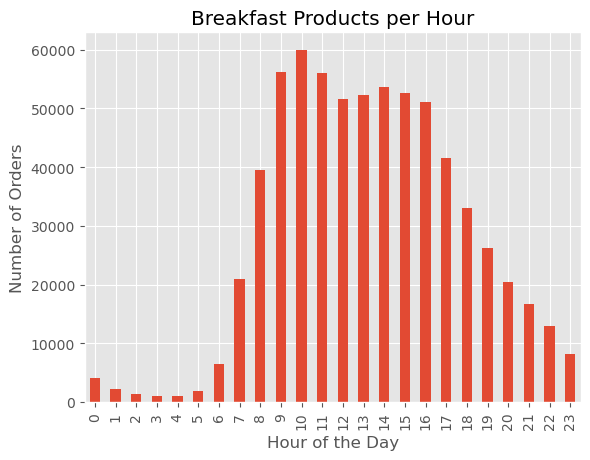

In [49]:
# Visualize 'breakfast' products purchases per 'hour of the day'

ax = df_breakfast['Order_hour_of_day'].value_counts().sort_index().plot(kind='bar', title='Breakfast Products per Hour')

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Orders')


## 5d) Customers purchasing 'Babies' products

In [50]:
# Create conditions for customers purchasing 'babies' products and customers not purchasing 'babies' products
# Condition for purchasing 'Babies'
df_depts.loc[df_depts['Department'] == 'babies', 'Baby'] = 'Yes'

In [51]:
# Create condition for not purchasing 'Babies' products
df_depts.loc[df_depts['Department'] !='babies', 'Baby'] = 'No'

In [52]:
# Check the frequency of customers purchasing for 'Babies'
df_depts['Baby'].value_counts(dropna = False)

No     30554172
Yes      410392
Name: Baby, dtype: int64

## 5e) Customers purchasing 'Pets' products

In [53]:
# Create conditions for customers purchasing 'pets' products and customers not purchasing 'pets' products
# Condition for purchasing 'Pets'
df_depts.loc[df_depts['Department'] == 'pets', 'Pet'] = 'Yes'

In [54]:
# Create condition for not purchasing 'Babies' products
df_depts.loc[df_depts['Department'] != 'pets', 'Pet'] = 'No'

In [55]:
# Check the frequency of customers purchasing for 'Pets'
df_depts['Pet'].value_counts(dropna = False)

No     30871504
Yes       93060
Name: Pet, dtype: int64

## 5f) Customers shopping on weekends vs weekdays

In [56]:
# Day of the week: 0 = Saturday, 1 = Sunday; 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thursday, 6 = 'Friday'
# Create condition for ordering on weekdays AS 'Weekday' shopper

df_depts.loc[df_depts['Orders_day_of_the_week'].isin([2,3,4,5,6]), 'Day_Shopper'] = 'Weekday'

In [57]:
# Create condition for ordering on weekdays AS 'Weekend' shopper

df_depts.loc[df_depts['Orders_day_of_the_week'].isin([0,1]), 'Day_Shopper'] = 'Weekend'

In [58]:
df_depts['Day_Shopper'].value_counts(dropna = False)

Weekday    19644268
Weekend    11320296
Name: Day_Shopper, dtype: int64

*But this is showing counts of orders for this flag and not grouped by customer. How do I see this at a customer level?*

# STEP 7
#### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


In [59]:
# min, max, mean, median usage frequency (Add_To_Cart_Order) by Age_Group

df_depts.groupby('Age_Group')['Add_To_Cart_Order'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Age_Group,,,,
Middle-Aged,1,145,8.354216,6.0
Senior,1,99,8.307779,6.0
Young Adult,1,109,8.415515,6.0


In [60]:
# min, max, mean, median usage frequency (Add_To_Cart_Order) by Income_Bracket

df_depts.groupby('Income_Bracket')['Add_To_Cart_Order'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Income_Bracket,,,,
High Income,1,121,9.241707,7.0
Low Income,1,137,7.320646,5.0
Middle Income,1,114,8.473635,7.0
Upper-Middle Income,1,145,8.492069,7.0


In [61]:
# min, max, mean, median usage frequency (Add_To_Cart_Order) by Household_Size

df_depts.groupby('Household_Size')['Add_To_Cart_Order'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Household_Size,,,,
Large,1,145,8.375061,6.0
Medium,1,114,8.370250,6.0
Small,1,137,8.336567,6.0


In [62]:
# min, max, mean, median usage frequency (Add_To_Cart_Order) by Region

df_depts.groupby('Region')['Add_To_Cart_Order'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Region,,,,
Midwest,1,109,8.353883,6.0
Northeast,1,145,8.376380,6.0
South,1,137,8.365296,6.0
West,1,114,8.359292,6.0


In [63]:
# min, max, mean, median expenditure (Prices) by Region

df_depts.groupby('Region')['Prices'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Region,,,,
Midwest,1.0,25.0,7.792318,7.4
Northeast,1.0,25.0,7.781441,7.4
South,1.0,25.0,7.794439,7.4
West,1.0,25.0,7.790308,7.4


# Step 8
*Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.*

### Income Bracket by Region

In [64]:
# Create crosstabs to compare one variable against another
# Create a crosstab to compare Income_Bracket with Region

crosstab_income_region = pd.crosstab(df_depts['Region'], df_depts['Income_Bracket'], dropna = False)

In [65]:
crosstab_income_region

Income_Bracket,High Income,Low Income,Middle Income,Upper-Middle Income
Region,,,,
Midwest,64093,783764,3077656,3336000
Northeast,40106,587137,2361064,2476378
South,83446,1142572,4504622,4580499
West,66497,849081,3451266,3560383


[Text(0, 0, 'Midwest'),
 Text(1, 0, 'Northeast'),
 Text(2, 0, 'South'),
 Text(3, 0, 'West')]

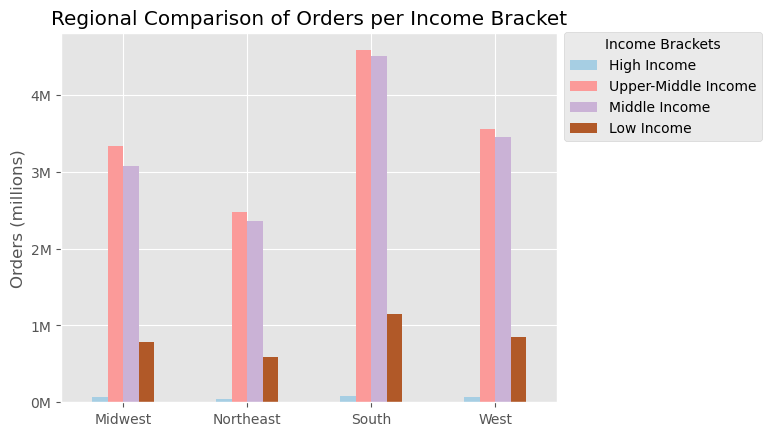

In [71]:
# Visualize count of orders grouped by customer Income Bracket and Region:

# Define the desired order of the columns
desired_order = ['High Income', 'Upper-Middle Income', 'Middle Income', 'Low Income']

# Reorder the columns of the crosstab using loc and the desired_order list
crosstab_income_region = crosstab_income_region.loc[:, desired_order]

# Plot the chart
barchart_income_region = crosstab_income_region.plot(kind = 'bar', colormap='Paired')
barchart_income_region.legend(title='Income Brackets',bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Regional Comparison of Orders per Income Bracket')
plt.ylabel('Orders (millions)', fontsize = 12)
plt.xlabel('',  fontsize = 12)

# Define a custom function to format y-axis labels in millions
def millions_formatter(x, pos):
    return '{:.0f}M'.format(x / 1000000)

# Create a FuncFormatter object for the custom function
formatter = FuncFormatter(millions_formatter)

# Apply the custom formatter to the y-axis
barchart_income_region.yaxis.set_major_formatter(formatter)

# Rotate the x-axis labels by 90 degrees
barchart_income_region.set_xticklabels(barchart_income_region.get_xticklabels(), rotation=0)


In [72]:
barchart_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_income_region.png'),bbox_inches='tight')

### Age Group by Region

In [69]:
# Create a crosstab to compare Age_Group with Region

crosstab_age_region = pd.crosstab(df_depts['Region'], df_depts['Age_Group'], dropna = False)
crosstab_age_region

Age_Group,Middle-Aged,Senior,Young Adult
Region,,,
Midwest,2874466,1904046,2483001
Northeast,2108141,1484807,1871737
South,3994431,2708461,3608247
West,3126872,2098230,2702125


[Text(0, 0, 'Midwest'),
 Text(1, 0, 'Northeast'),
 Text(2, 0, 'South'),
 Text(3, 0, 'West')]

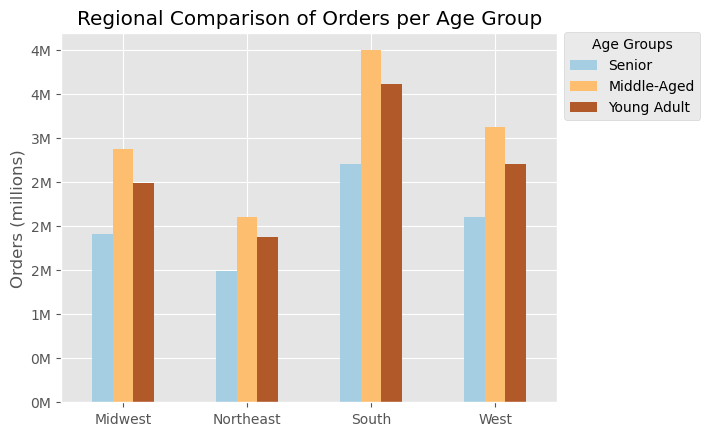

In [73]:
# Visualize count of orders grouped by customer Age Group and Region:
from matplotlib.ticker import FuncFormatter, ScalarFormatter
from matplotlib.lines import Line2D

# Define the desired order of the columns
desired_order = ['Senior', 'Middle-Aged', 'Young Adult']

# Reorder the columns of the crosstab using loc and the desired_order list
crosstab_age_region = crosstab_age_region.loc[:, desired_order]

age_region_bar = crosstab_age_region.plot(kind = 'bar', colormap='Paired')
age_region_bar.legend(title='Age Groups', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Regional Comparison of Orders per Age Group')
plt.ylabel('Orders (millions)', fontsize = 12)
plt.xlabel('',  fontsize = 12)

# Define a custom function to format y-axis labels in millions
def millions_formatter(x, pos):
    return '{:.0f}M'.format(x / 1000000)

# Create a FuncFormatter object for the custom function
formatter = FuncFormatter(millions_formatter)

# Apply the custom formatter to the y-axis
age_region_bar.yaxis.set_major_formatter(formatter)

# Rotate the x-axis labels by 90 degrees
age_region_bar.set_xticklabels(barchart_income_region.get_xticklabels(), rotation=0)

In [74]:
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_bar.png'),bbox_inches='tight')

### Household Size by Region

In [75]:
# Create a crosstab to compare Age_Group with Region

crosstab_household_region = pd.crosstab(df_depts['Region'], df_depts['Household_Size'], dropna = False)
crosstab_household_region

Household_Size,Large,Medium,Small
Region,,,
Midwest,1787286,3651411,1822816
Northeast,1381233,2728970,1354482
South,2585864,5143342,2581933
West,2018133,3928644,1980450


[Text(0, 0, 'Midwest'),
 Text(1, 0, 'Northeast'),
 Text(2, 0, 'South'),
 Text(3, 0, 'West')]

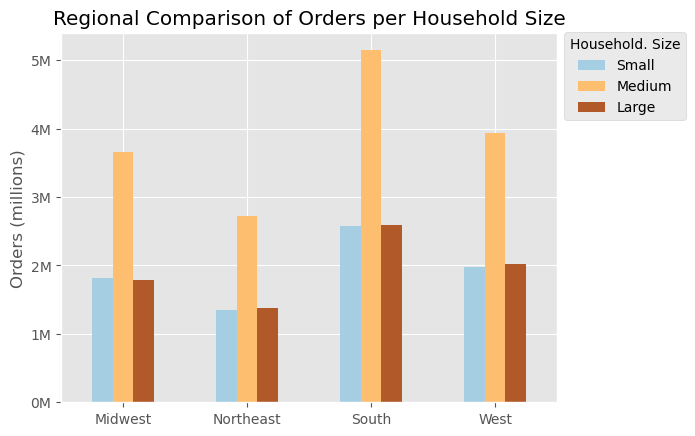

In [76]:
# Visualize count of orders grouped by Household Size and Region:

# Define the desired order of the columns
desired_order = ['Small', 'Medium', 'Large']

# Reorder the columns of the crosstab using loc and the desired_order list
crosstab_household_region = crosstab_household_region.loc[:, desired_order]

household_region_bar = crosstab_household_region.plot(kind = 'bar', colormap='Paired')
household_region_bar.legend(title='Household. Size', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Regional Comparison of Orders per Household Size')
plt.ylabel('Orders (millions)', fontsize = 12)
plt.xlabel('',  fontsize = 12)

# Define a custom function to format y-axis labels in millions
def millions_formatter(x, pos):
    return '{:.0f}M'.format(x / 1000000)

# Create a FuncFormatter object for the custom function
formatter = FuncFormatter(millions_formatter)

# Apply the custom formatter to the y-axis
household_region_bar.yaxis.set_major_formatter(formatter)

# Rotate the x-axis labels by 90 degrees
household_region_bar.set_xticklabels(barchart_income_region.get_xticklabels(), rotation=0)

In [77]:
household_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'household_region_bar.png'),bbox_inches='tight')

## Customers with Babies per region

In [ ]:
# Create a crosstab to compare Babies with Region

crosstab_babies_region = pd.crosstab(df_depts['Region'], df_depts['Baby'], dropna = False)
crosstab_babies_region

In [ ]:
# Visualize customers purchasing Baby products per Region:

babies_region_bar = crosstab_babies_region.plot(kind = 'bar', stacked=True, colormap='Paired')
babies_region_bar.legend(title='Babies', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Customers purchasing Baby Products')
plt.ylabel('Orders (millions)', fontsize = 12)
plt.xlabel('',  fontsize = 12)

# Rotate the x-axis labels by 90 degrees
babies_region_bar.set_xticklabels(barchart_income_region.get_xticklabels(), rotation=0)

## Customers with Pets per region

In [ ]:
# Get the value counts of Customers purchasing pets products

pets_yes = df_depts[df_depts['Pet'] == 'Yes']
pets_yes['Pet'].value_counts()


# Step 9
Produce suitable charts to illustrate your results and export them in your project folder

### Key Question 3: 
Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [ ]:
# Dataframe of prices by department

prices_dept = df_depts[['Department', 'Prices']]

In [ ]:
# Aggregations for prices by department

prices_dept.groupby('Department')['Prices'].agg(['mean','min', 'max', 'median'])

In [ ]:
# Rename column 'Rrice_Range_Loc' to 'Price_Range_Loc' to correct typo
df_depts = df_depts.rename(columns={'Rrice_Range_Loc': 'Price_Range_Loc'})

In [ ]:
# Check the column rename
df_depts['Price_Range_Loc']

In [ ]:
# Get the value counts of of High-range, Low-range and Mid-range products
df_depts['Price_Range_Loc'].value_counts(dropna = False)

In [ ]:
# Get the count of High-range, Low-range and Mid-range products ordered from each department
df_depts.groupby(['Department', 'Price_Range_Loc'])['Price_Range_Loc'].count().unstack().fillna(0)

In [ ]:
# Create a crosstab to compare Price-ranges with Department

crosstab_Price_Range_Dept = pd.crosstab(df_depts['Department'], df_depts['Price_Range_Loc'], dropna = False)
crosstab_Price_Range_Dept

In [ ]:
# Visualize count of High-range, Low-range and Mid-range products ordered from each department:

Price_Range_Dept_bar = crosstab_Price_Range_Dept.plot(kind = 'bar', stacked = True, colormap='Paired')
Price_Range_Dept_bar.legend(title='Price-Ranges', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Product Price-Ranges by Department')
plt.ylabel('Orders (millions)', fontsize = 12)
plt.xlabel('Department',  fontsize = 12)


# Export Charts

In [ ]:
# Export Orders_per_Hour_hist
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_Group_bar.png'))

In [ ]:
# Export crosstab_Price_Range_Dept
Price_Range_Dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_Range_Dept_bar.png'))

In [ ]:
# Export df_depts as instacart_analysis_data.pkl
df_depts.to_pickle((os.path.join(path, '02 Data', '02b Prepared Data', 'instacart_analysis_data.pkl')))
